## Build a simple trading strategy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA50 and MA100

In [2]:
#import Micrsoft's stock data, add two columns - MA50 and MA100
#use dropna to remove any "Not a Number" data
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['MA50'] = ms['Close'].rolling(50).mean()
ms['MA100'] = ms['Close'].rolling(100).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100
Date,,,,,,,,
2015-05-26,46.830002,46.880001,46.189999,46.590000,43.565056,29581900,44.4686,44.2360
2015-05-27,46.820000,47.770000,46.619999,47.610001,44.518841,27335600,44.5896,44.2476
2015-05-28,47.500000,48.020000,47.389999,47.450001,44.369232,19283700,44.7046,44.2545
2015-05-29,47.430000,47.570000,46.590000,46.860001,43.817532,35428100,44.7918,44.2598
2015-06-01,47.060001,47.770000,46.619999,47.230000,44.163509,28837300,44.8906,44.2756


### 2. Add "Shares" column to make decisions base on the strategy 

In [3]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

ms['Shares'] = [1 if ms.loc[ei, 'MA50']>ms.loc[ei, 'MA100'] else 0 for ei in ms.index]

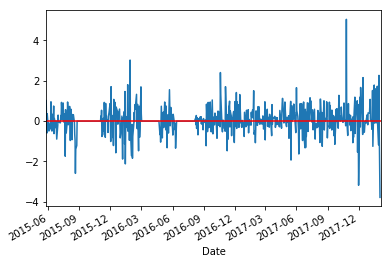

In [4]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [5]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,86.5244,82.3042,1,95.010002,2.270004,27.659999
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,86.7606,82.5109,1,94.260002,-0.750000,26.909999
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,86.9978,82.7137,1,91.779999,-2.480003,24.429996
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,87.1828,82.8839,1,88.000000,-3.779999,20.649997
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,87.2684,83.0171,1,NaN,NaN,NaN


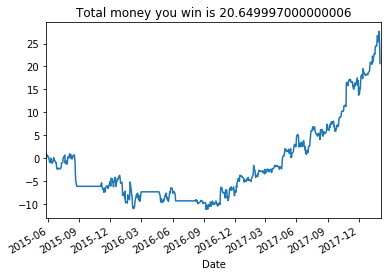

In [6]:
#plot the wealth to show the growth of profit over the period

ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).